## Stock Market Analysis

In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
get_ipython().magic('matplotlib inline')

In [2]:
df = pd.read_csv("C:/Users/Mikayla/Desktop/Test.csv", index_col = 0, parse_dates=True)

In [3]:
df.head()

,Time,Open,High,Low,Close,Up,Down
Date,,,,,,,
2002-11-04,11:20,-80.00,-78.75,-81.50,-78.75,268,259
2002-11-05,11:20,-75.25,-72.75,-75.25,-74.75,702,491
2002-11-06,11:20,-75.25,-74.00,-75.50,-74.00,290,935
2002-11-07,11:20,-71.75,-69.50,-72.00,-70.75,731,306
2002-11-08,11:20,-80.00,-79.50,-81.25,-81.00,189,267


In [4]:
# Summery stats for SoyBeans Futures
df.describe()

,Open,High,Low,Close,Up,Down
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000
mean,719.138726,728.505975,710.349662,719.175648,23988.548591,24132.639233
std,466.494150,468.494152,464.510704,466.366302,18690.561922,18720.265268
min,-105.500000,-103.250000,-105.750000,-105.750000,0.000000,0.000000
25%,209.500000,219.375000,199.250000,209.375000,3627.500000,3791.000000
50%,890.500000,900.250000,881.000000,891.250000,25456.000000,25846.000000
75%,1139.500000,1147.375000,1132.500000,1139.250000,35811.500000,36202.500000
max,1536.500000,1554.250000,1529.750000,1535.000000,136227.000000,124512.000000


In [5]:
# General Info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4435 entries, 2002-11-04 to 2020-07-23
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4435 non-null   object 
 1   Open    4435 non-null   float64
 2   High    4435 non-null   float64
 3   Low     4435 non-null   float64
 4   Close   4435 non-null   float64
 5   Up      4435 non-null   int64  
 6   Down    4435 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 277.2+ KB


In [6]:
# We'll use pct_change to find the percent change for each day
df['Daily Return'] = df['Close'].pct_change()
df.dropna(inplace=True)

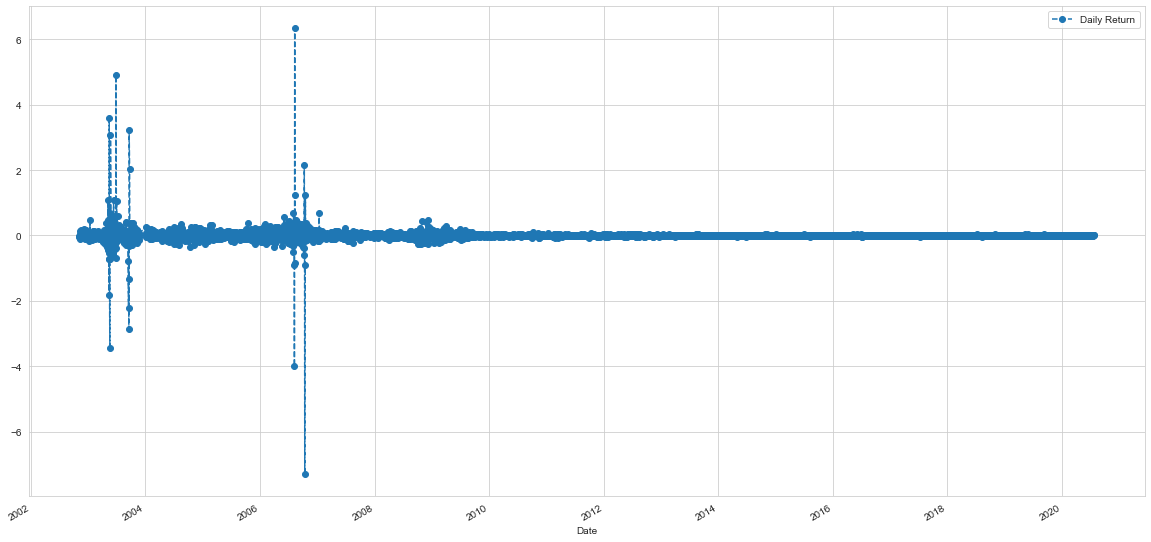

In [7]:
# Lets plot the daily return percentage
df['Daily Return'].plot(figsize=(20,10), legend=True, linestyle='--', marker='o')

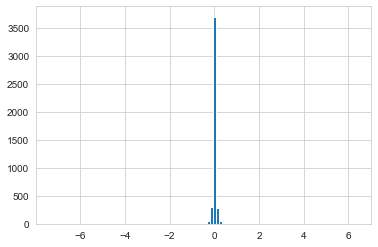

In [8]:
# only with histogram
df['Daily Return'].hist(bins=100)

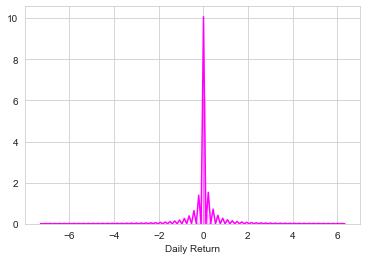

In [9]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(df['Daily Return'].dropna(), bins=100, color='magenta')

In [10]:
# The 0.05 empirical quantile of daily returns is at -0.021. 
#That means that with 95% confidence, our worst daily loss will not exceed 2.1%. 
#If we have a 1 million dollar investment, our one-day 5% VaR is 0.021* 1,000,000 = $21,000.

round(df["Daily Return"].quantile(0.05),3)

-0.103

In [11]:
# #### Value at Risk using the Monte Carlo method
#Using the Monte Carlo to run many trials with random market conditions, 
#then we'll calculate portfolio losses for each trial. After this, we'll use the 
#aggregation of all these simulations to establish how risky the stock/assest is.
# 
# Let's start with a brief explanation of what we're going to do:
# 
# We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. 
#This means that the stock price follows a random walk and is consistent with (at the very least) the weak 
#form of the efficient market hypothesis (EMH): past price information is already incorporated 
#and the next price movement is "conditionally independent" of past price movements.
# 
# This means that the past information on the price of a stock is independent of where the stock price will 
#be in the future, basically meaning, you can't perfectly predict the future solely based on the 
#previous price of a stock.
# 

# Now we see that the change in the stock price is the current stock price multiplied by two terms. 
#The first term is known as "drift", which is the average daily return multiplied by the change of time. 
#The second term is known as "shock", for each time period the stock will "drift" and then experience a 
#"shock" which will randomly push the stock price up or down. By simulating this series of steps of 
#drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.
# 
# For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model i
#e. geometric Brownian motion (GBM).
# 
# check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

# To demonstrate a basic Monte Carlo method, we will start with just a few simulations. 
#First we'll define the variables we'll be using in the Soy Beans Future market
# 

In [12]:
# Set up our time horizon
days = 252

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got from SoyBeans 
mu = df["Daily Return"].mean()

# Now let's grab the volatility of the stock from the std() of the average return from the SoyBeans
sigma = df["Daily Return"].std()

In [13]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Final price distribution for SoyBeans after 252 days')

C:\Users\Mikayla\anaconda3.1\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


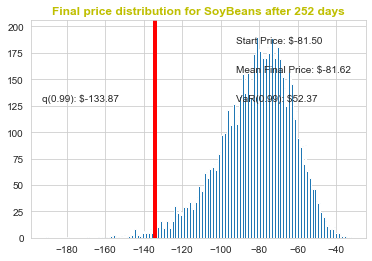

In [14]:
# Lets start with Soy Bean Futures Contracts
start_price = -81.50

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


# Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.
# 
# For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

# In[54]:



# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should 
#fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for SoyBeans after %s days"% days, weight='bold', color='Y')